In [238]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display
import numpy as np
import matplotlib.ticker as mticker

In [239]:
departements = {
    "01": "01 Ain",
    "02": "02 Aisne",
    "03": "03 Allier",
    "04": "04 Alpes-de-Haute-Provence",
    "05": "Hautes-Alpes",
    "06": "Alpes-Maritimes",
    "07": "Ardèche",
    "08": "Ardennes",
    "09": "Ariège",
    "10": "Aube",
    "11": "Aude",
    "12": "Aveyron",
    "13": "Bouches-du-Rhône",
    "14": "Calvados",
    "15": "Cantal",
    "16": "Charente",
    "17": "Charente-Maritime",
    "18": "Cher",
    "19": "Corrèze",
    "20": "test",
    "21": "Côte-d'Or",
    "22": "Côtes-d'Armor",
    "23": "Creuse",
    "24": "Dordogne",
    "25": "Doubs",
    "26": "Drôme",
    "27": "Eure",
    "28": "Eure-et-Loir",
    "29": "Finistère",
    "2A": "Corse-du-Sud",
    "2B": "Haute-Corse",
    "30": "Gard",
    "31": "Haute-Garonne",
    "32": "Gers",
    "33": "Gironde",
    "34": "Hérault",
    "35": "Ille-et-Vilaine",
    "36": "Indre",
    "37": "Indre-et-Loire",
    "38": "Isère",
    "39": "Jura",
    "40": "Landes",
    "41": "Loir-et-Cher",
    "42": "Loire",
    "43": "Haute-Loire",
    "44": "Loire-Atlantique",
    "45": "Loiret",
    "46": "Lot",
    "47": "Lot-et-Garonne",
    "48": "Lozère",
    "49": "Maine-et-Loire",
    "50": "Manche",
    "51": "Marne",
    "52": "Haute-Marne",
    "53": "Mayenne",
    "54": "Meurthe-et-Moselle",
    "55": "Meuse",
    "56": "Morbihan",
    "57": "Moselle",
    "58": "Nièvre",
    "59": "Nord",
    "60": "Oise",
    "61": "Orne",
    "62": "Pas-de-Calais",
    "63": "Puy-de-Dôme",
    "64": "Pyrénées-Atlantiques",
    "65": "Hautes-Pyrénées",
    "66": "Pyrénées-Orientales",
    "67": "Bas-Rhin",
    "68": "Haut-Rhin",
    "69": "Rhône",
    "70": "Haute-Saône",
    "71": "Saône-et-Loire",
    "72": "Sarthe",
    "73": "Savoie",
    "74": "Haute-Savoie",
    "75": "Paris",
    "76": "Seine-Maritime",
    "77": "Seine-et-Marne",
    "78": "Yvelines",
    "79": "Deux-Sèvres",
    "80": "Somme",
    "81": "Tarn",
    "82": "Tarn-et-Garonne",
    "83": "Var",
    "84": "Vaucluse",
    "85": "Vendée",
    "86": "Vienne",
    "87": "Haute-Vienne",
    "88": "Vosges",
    "89": "Yonne",
    "90": "Territoire de Belfort",
    "91": "Essonne",
    "92": "Hauts-de-Seine",
    "93": "Seine-Saint-Denis",
    "94": "Val-de-Marne",
    "95": "Val-d'Oise",
    "971": "Guadeloupe",
    "972": "Martinique",
    "973": "Guyane",
    "974": "La Réunion",
    "976": "Mayotte"
}
arrondissements_marseille = {
    'marseille 1er arrondissement': 'Mar1',
    'marseille 2e arrondissement': 'Mar2',
    'marseille 3e arrondissement': 'Mar3',
    'marseille 4e arrondissement': 'Mar4',
    'marseille 5e arrondissement': 'Mar5',
    'marseille 6e arrondissement': 'Mar6',
    'marseille 7e arrondissement': 'Mar7',
    'marseille 8e arrondissement': 'Mar8',
    'marseille 9e arrondissement': 'Mar9',
    'marseille 10e arrondissement': 'Mar10',
    'marseille 11e arrondissement': 'Mar11',
    'marseille 12e arrondissement': 'Mar12',
    'marseille 13e arrondissement': 'Mar13',
    'marseille 14e arrondissement': 'Mar14',
    'marseille 15e arrondissement': 'Mar15',
    'marseille 16e arrondissement': 'Mar16'
}



Loyer des Maison sur l'année 2018

In [240]:
df_2018m= pd.read_csv('2018\loyer_maison_2018.csv', encoding='latin-1')
df_2018m=pd.DataFrame(df_2018m)

In [241]:
df_2018m.sort_values("DEP").head()
df_2018m=df_2018m.drop(columns=['id_zone','INSEE', 'EPCI','REG', 'TYPPRED', 'NBobs_commune', 'Nbobs_maille', 'R2adj'])
df_2018m['année_etude']='2018'
df_2018m['type_de_logement']='Maison'
df_2018m=df_2018m[['année_etude','type_de_logement', 'DEP','LIBGEO','loypredm2', 'lwr.IPm2', 'upr.IPm2']]


In [242]:
df_2018m=df_2018m.rename(columns={"loypredm2":"Loyer/m²"})
df_2018m=df_2018m.rename(columns={"lwr.IPm2":"Loyer_min/m²"})
df_2018m=df_2018m.rename(columns={"upr.IPm2":"Loyer_max/m²"})
print(df_2018m['DEP'].size)

35441


In [243]:
df_2018m['DEP']=df_2018m['DEP'].apply(lambda x: f"{x:02}")
df_2018m['DEP']=df_2018m['DEP'].replace(departements)

Loyer des appatements sur l'année 2018


In [244]:
df_2018a= pd.read_csv('2018\loyer_appartement_2018.csv', encoding='latin-1')
df_2018a=pd.DataFrame(df_2018a)
df_2018a.sort_values("DEP").head()
df_2018a= df_2018a.drop(columns=['id_zone','INSEE', 'EPCI','REG', 'TYPPRED', 'NBobs_commune', 'NBobs_maille', 'R2adj'])
df_2018a['année_etude']='2018'
df_2018a['type_de_logement']='Appartement'
df_2018a=df_2018a[['année_etude','type_de_logement', 'DEP','LIBGEO','loypredm2', 'lwr.IPm2', 'upr.IPm2']]
df_2018a=df_2018a.rename(columns={"loypredm2":"Loyer/m²"})
df_2018a=df_2018a.rename(columns={"lwr.IPm2":"Loyer_min/m²"})
df_2018a=df_2018a.rename(columns={"upr.IPm2":"Loyer_max/m²"})
df_2018a['DEP']=df_2018a['DEP'].apply(lambda x: f"{x:02}")
df_2018a['DEP']=df_2018a['DEP'].replace(departements)



On etudie maintenant les villes Paris, Lyon, Lille Bordeaux, TOulouse, Marseille  

In [245]:
df_2018=pd.concat([df_2018a, df_2018m], axis=0, ignore_index=True)
df_2018_moy= df_2018.groupby(['LIBGEO'])[['Loyer/m²', 'Loyer_min/m²', 'Loyer_max/m²']].mean()
df_2018 = pd.merge(df_2018[['année_etude','DEP','LIBGEO']].drop_duplicates(),df_2018_moy, on='LIBGEO')
df_2018['LIBGEO']=df_2018['LIBGEO'].str.lower()
df_newa=df_2018
pattern_villes = r'^(Marseille|Paris|Lille|Lyon|Nice|Toulouse|Bordeaux)( [0-9]{1,2}(?:er|e) Arrondissement)?$'
df_2018 = df_2018[df_2018['LIBGEO'].str.contains(pattern_villes, case=False, na=False)]

C:\Users\amzil\AppData\Local\Temp\ipykernel_17632\4185704973.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_2018 = df_2018[df_2018['LIBGEO'].str.contains(pattern_villes, case=False, na=False)]


Loyer des Maison sur l'année 2022

In [246]:
df_2022m= pd.read_csv('2022\loyer_maison_2022.csv', encoding='latin-1')
df_2022m=pd.DataFrame(df_2022m)

In [247]:
df_2022m.sort_values("DEP").head()
df_2022m= df_2022m.drop(columns=['id_zone','INSEE_C', 'EPCI','REG', 'TYPPRED', 'nbobs_com', 'nbobs_mail', 'R2_adj'])
df_2022m['année_etude']='2022'
df_2022m['type_de_logement']='Maison'
df_2022m=df_2022m[['année_etude','type_de_logement', 'DEP','LIBGEO', 'loypredm2', 'lwr.IPm2', 'upr.IPm2']]

In [248]:
df_2022m=df_2022m.rename(columns={"loypredm2":"Loyer/m²"})
df_2022m=df_2022m.rename(columns={"lwr.IPm2":"Loyer_min/m²"})
df_2022m=df_2022m.rename(columns={"upr.IPm2":"Loyer_max/m²"})
print(df_2022m['DEP'].size)

34980


In [249]:
df_2022m['DEP']=df_2022m['DEP'].apply(lambda x: f"{x:02}")
df_2022m['DEP']=df_2022m['DEP'].replace(departements)

Loyer des appatements sur l'année 2022

In [250]:
df_2022a= pd.read_csv('2022\loyer_appartement_2022.csv', encoding='latin-1')
df_2022a=pd.DataFrame(df_2022a)

df_2022a.sort_values("DEP").head()
df_2022a= df_2022a.drop(columns=['id_zone','INSEE_C', 'EPCI','REG', 'TYPPRED', 'nbobs_com', 'nbobs_mail', 'R2_adj'])
df_2022a['année_etude']='2022'
df_2022a['type_de_logement']='Appartement'
df_2022a=df_2022a[['année_etude','type_de_logement', 'DEP','LIBGEO','loypredm2', 'lwr.IPm2', 'upr.IPm2']]
df_2022a=df_2022a.rename(columns={"loypredm2":"Loyer/m²"})
df_2022a=df_2022a.rename(columns={"lwr.IPm2":"Loyer_min/m²"})
df_2022a=df_2022a.rename(columns={"upr.IPm2":"Loyer_max/m²"})
df_2022a['DEP']=df_2022a['DEP'].apply(lambda x: f"{x:02}")
df_2022a['DEP']=df_2022a['DEP'].replace(departements)

On etudie maintenant Paris, Lyon, Lille Bordeaux, TOulouse, Marseille

In [251]:
df_2022=pd.concat([df_2022a, df_2022m], axis=0, ignore_index=True)
df_2022_moy = df_2022.groupby(['LIBGEO'])[['Loyer/m²', 'Loyer_min/m²', 'Loyer_max/m²']].mean()
df_2022 = pd.merge(df_2022[['année_etude','DEP','LIBGEO']].drop_duplicates(),df_2022_moy, on='LIBGEO')
df_2022['LIBGEO']=df_2022['LIBGEO'].str.lower()
df_newb=df_2022
pattern_villes = r'^(Marseille|Paris|Lyon|Lille|Nice|Toulouse|Bordeaux)( [0-9]{1,2}(?:er|e) Arrondissement)?$'
df_2022 = df_2022[df_2022['LIBGEO'].str.contains(pattern_villes, case=False, na=False)]


C:\Users\amzil\AppData\Local\Temp\ipykernel_17632\1373055917.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_2022 = df_2022[df_2022['LIBGEO'].str.contains(pattern_villes, case=False, na=False)]


Loyer des Maison sur l'année 2023

In [252]:
df_2023m= pd.read_csv('2023\loyer_maison_2023.csv', encoding='latin-1')
df_2023m=pd.DataFrame(df_2023m)

In [253]:

df_2023m.sort_values("DEP").head()
df_2023m= df_2023m.drop(columns=['id_zone','INSEE_C', 'EPCI','REG', 'TYPPRED', 'nbobs_com', 'nbobs_mail', 'R2_adj'])
df_2023m['année_etude']='2023'
df_2023m['type_de_logement']='Maison'
df_2023m=df_2023m[['année_etude','type_de_logement', 'DEP','LIBGEO', 'loypredm2', 'lwr.IPm2', 'upr.IPm2']]

In [254]:
df_2023m=df_2023m.rename(columns={"loypredm2":"Loyer/m²"})
df_2023m=df_2023m.rename(columns={"lwr.IPm2":"Loyer_min/m²"})
df_2023m=df_2023m.rename(columns={"upr.IPm2":"Loyer_max/m²"})
print(df_2023m['DEP'].size)

34970


In [255]:
df_2023m['DEP']=df_2023m['DEP'].apply(lambda x: f"{x:02}")
df_2023m['DEP']=df_2023m['DEP'].replace(departements)

Loyer des appatements sur l'année 2023

In [256]:
df_2023a= pd.read_csv('2023\loyer_appartement_2023.csv', encoding='latin-1')
df_2023a=pd.DataFrame(df_2023a)

df_2023a.sort_values("DEP").head()
df_2023a= df_2023a.drop(columns=['id_zone','INSEE_C', 'EPCI','REG', 'TYPPRED', 'nbobs_com', 'nbobs_mail', 'R2_adj'])
df_2023a['année_etude']='2023'
df_2023a['type_de_logement']='Appartement'
df_2023a=df_2023a[['année_etude','type_de_logement', 'DEP','LIBGEO','loypredm2', 'lwr.IPm2', 'upr.IPm2']]
df_2023a=df_2023a.rename(columns={"loypredm2":"Loyer/m²"})
df_2023a=df_2023a.rename(columns={"lwr.IPm2":"Loyer_min/m²"})
df_2023a=df_2023a.rename(columns={"upr.IPm2":"Loyer_max/m²"})
df_2023a['DEP']=df_2023a['DEP'].apply(lambda x: f"{x:02}")
df_2023a['DEP']=df_2023a['DEP'].replace(departements)

On etudie maintenant Paris, Lyon, Lille Bordeaux, TOulouse, Marseille

In [257]:

df_2023=pd.concat([df_2023a, df_2023m], axis=0, ignore_index=True)
df_2023_moy = df_2023.groupby(['LIBGEO'])[['Loyer/m²', 'Loyer_min/m²', 'Loyer_max/m²']].mean()
df_2023 = pd.merge(df_2023[['année_etude','DEP','LIBGEO']].drop_duplicates(),df_2023_moy, on='LIBGEO')
df_2023['LIBGEO']=df_2023['LIBGEO'].str.lower()
df_newc=df_2023
pattern_villes = r'^(Marseille|Paris|Lyon|Lille|Nice|Toulouse|Bordeaux)( [0-9]{1,2}(?:er|e) Arrondissement)?$'
df_2023 = df_2023[df_2023['LIBGEO'].str.contains(pattern_villes, case=False, na=False)]


C:\Users\amzil\AppData\Local\Temp\ipykernel_17632\401802395.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_2023 = df_2023[df_2023['LIBGEO'].str.contains(pattern_villes, case=False, na=False)]


On concatene les 2 tableau

In [258]:
df_final=pd.concat([df_2018, df_2022,df_2023], axis=0, ignore_index=True)


Tableau par ville

Lyon

In [259]:
df_final_lyon=df_final[df_final['LIBGEO'].str.contains('Lyon', case=False, na=False)]
df_final_lyon.head(4)

,année_etude,DEP,LIBGEO,Loyer/m²,Loyer_min/m²,Loyer_max/m²
20,2018,Rhône,lyon 1er arrondissement,14.073177,9.257803,21.462226
21,2018,Rhône,lyon 2e arrondissement,14.330416,9.941264,20.660535
22,2018,Rhône,lyon 3e arrondissement,14.069885,9.718741,20.598741
23,2018,Rhône,lyon 4e arrondissement,13.926180,9.604555,20.391489


Data viz Loyer pour l'année 2018 et 2022.
Zone etudié : Lyon

C:\Users\amzil\AppData\Local\Temp\ipykernel_17632\2061879439.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


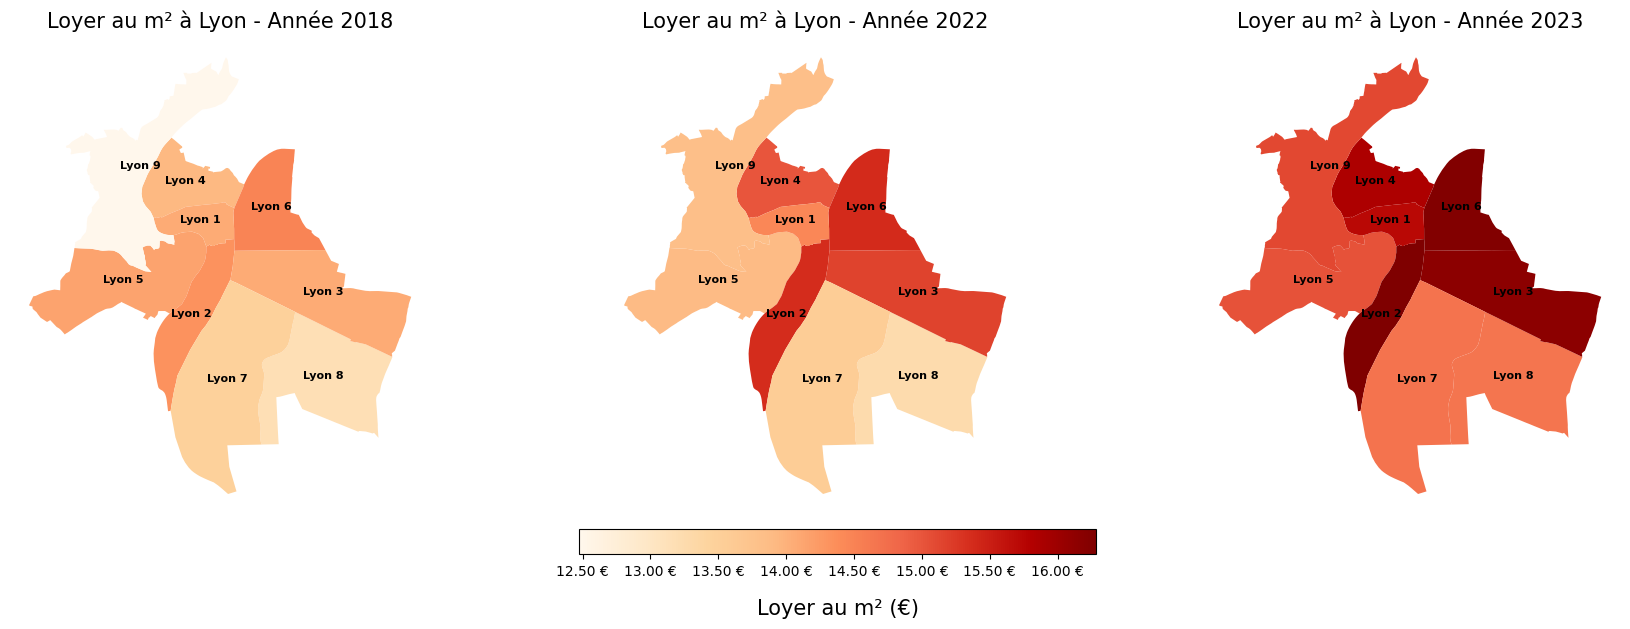

In [260]:
gdf = gpd.read_file("metropole-de-lyon_adr_voie_lieu.adrarrond")
lyon_gdf = gdf[gdf['nom'].str.contains('Lyon', case=False)]
lyon_gdf['nom']=lyon_gdf['nom'].str.lower()
merged_gdf1 = lyon_gdf.merge(df_2018, left_on='nom', right_on='LIBGEO')  
merged_gdf2 = lyon_gdf.merge(df_2022, left_on='nom', right_on='LIBGEO')  
merged_gdf3 = lyon_gdf.merge(df_2023, left_on='nom', right_on='LIBGEO') 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
cmap = plt.get_cmap('OrRd')
norm = mpl.colors.Normalize(vmin=min(merged_gdf1['Loyer/m²'].min(), merged_gdf2['Loyer/m²'].min(), merged_gdf3['Loyer/m²'].min()),
                            vmax=max(merged_gdf1['Loyer/m²'].max(), merged_gdf2['Loyer/m²'].max(), merged_gdf3['Loyer/m²'].max()))
merged_gdf1.plot(column='Loyer/m²', cmap=cmap, norm=norm, ax=ax1)
ax1.set_title('Loyer au m² à Lyon - Année 2018', fontsize=15)
ax1.axis('off')
merged_gdf2.plot(column='Loyer/m²', cmap=cmap, norm=norm, ax=ax2)
ax2.set_title('Loyer au m² à Lyon - Année 2022', fontsize=15)
ax2.axis('off')
merged_gdf3.plot(column='Loyer/m²', cmap=cmap, norm=norm, ax=ax3)
ax3.set_title('Loyer au m² à Lyon - Année 2023', fontsize=15)
ax3.axis('off')
for idx, row in merged_gdf1.iterrows():
    ax1.annotate(text=row['nomreduit'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black', weight='bold')
for idx, row in merged_gdf2.iterrows():
    ax2.annotate(text=row['nomreduit'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black', weight='bold')
for idx, row in merged_gdf3.iterrows():
    ax3.annotate(text=row['nomreduit'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black', weight='bold')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=[ax1, ax2, ax3], fraction=0.056, pad=-0.25, orientation='horizontal')
cbar.ax.set_xlabel('Loyer au m² (€)', labelpad=15, fontsize=15)
cbar.ax.tick_params(labelsize=10)
cbar.formatter = mpl.ticker.FuncFormatter(lambda x, _: f'{x:.2f} €')
cbar.update_ticks()
plt.tight_layout()
plt.show()


Marseille

In [261]:
df_final_marseille=df_final[df_final['LIBGEO'].str.contains('marseille', case=False, na=False)]
df_final_marseille.head()

,année_etude,DEP,LIBGEO,Loyer/m²,Loyer_min/m²,Loyer_max/m²
1,2018,Bouches-du-Rhône,marseille 1er arrondissement,12.760507,9.484348,17.175912
2,2018,Bouches-du-Rhône,marseille 2e arrondissement,13.232785,9.810443,17.854726
3,2018,Bouches-du-Rhône,marseille 3e arrondissement,12.062508,9.076243,16.052837
4,2018,Bouches-du-Rhône,marseille 4e arrondissement,13.197222,10.144646,17.213998
5,2018,Bouches-du-Rhône,marseille 5e arrondissement,12.615283,10.199177,15.607107


Data viz Loyer pour l'année 2018 et 2022.
Zone etudié : Marseille

C:\Users\amzil\AppData\Local\Temp\ipykernel_17632\404219540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['LIBGEO']=df_2018['LIBGEO'].str.lower()
C:\Users\amzil\AppData\Local\Temp\ipykernel_17632\404219540.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['LIBGEO']=df_2022['LIBGEO'].str.lower()
C:\Users\amzil\AppData\Local\Temp\ipykernel_17632\404219540.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_

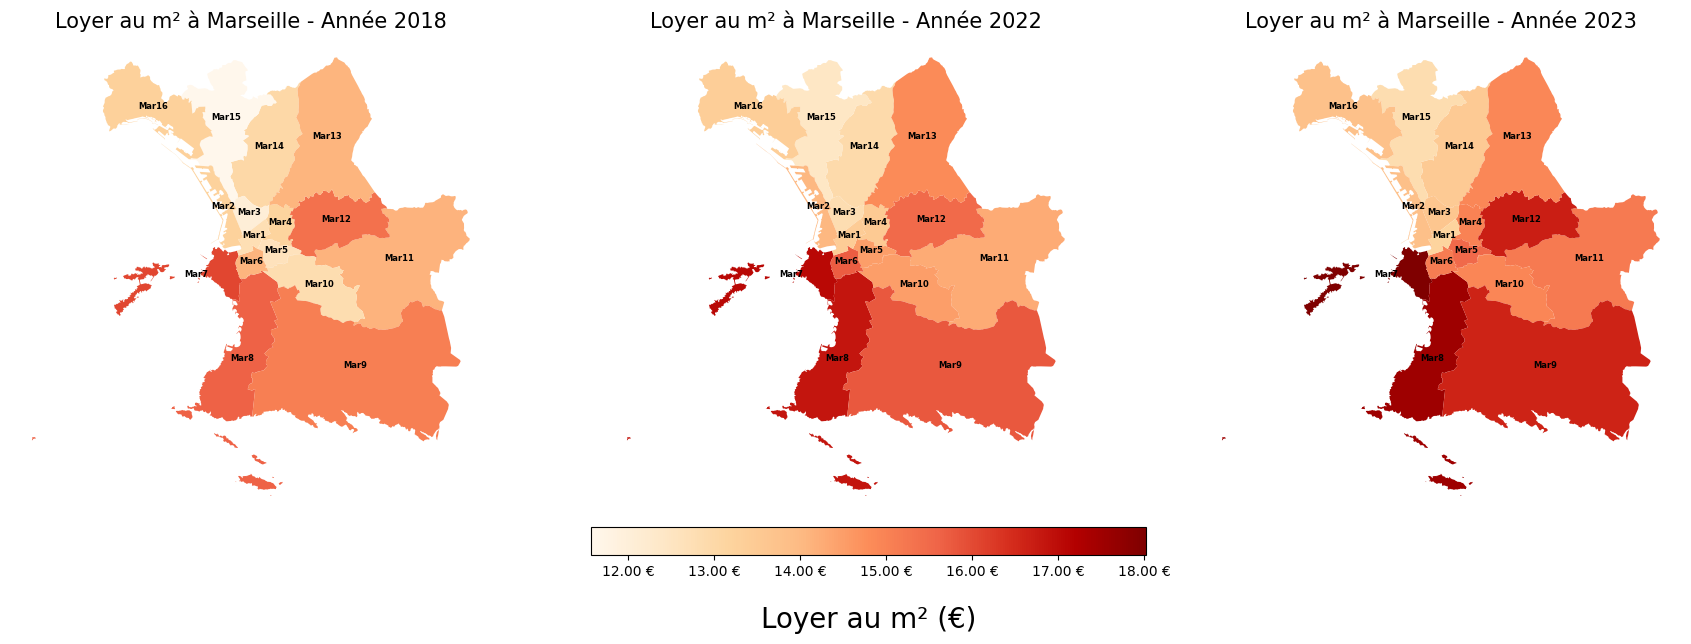

In [262]:
gdf1 = gpd.read_file("georef-france-commune-arrondissement-municipal")
gdf1 = gdf1[['com_arm_nam', 'geometry']]
gdf1_marseille = gdf1.loc[:, ~gdf1.columns.duplicated()]
gdf1_marseille = gdf1_marseille.rename(columns={'com_arm_nam': 'nom'})
gdf1_marseille['nom']=gdf1_marseille['nom'].str.lower()
df_2018['LIBGEO']=df_2018['LIBGEO'].str.lower()
df_2022['LIBGEO']=df_2022['LIBGEO'].str.lower()
merged_gdf1 = gdf1_marseille.merge(df_2018, left_on='nom', right_on='LIBGEO')  
merged_gdf2 = gdf1_marseille.merge(df_2022, left_on='nom', right_on='LIBGEO')
merged_gdf3 = gdf1_marseille.merge(df_2023, left_on='nom', right_on='LIBGEO')
merged_gdf1['nomreduit'] = merged_gdf1['nom'].map(arrondissements_marseille)
merged_gdf2['nomreduit'] = merged_gdf2['nom'].map(arrondissements_marseille)
merged_gdf3['nomreduit'] = merged_gdf3['nom'].map(arrondissements_marseille)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # Une ligne, trois colonnes
ax1.set_aspect('auto')
ax2.set_aspect('auto')
ax3.set_aspect('auto')
cmap = plt.get_cmap('OrRd')
norm = mpl.colors.Normalize(vmin=min(merged_gdf1['Loyer/m²'].min(), merged_gdf2['Loyer/m²'].min(), merged_gdf3['Loyer/m²'].min()),
                            vmax=max(merged_gdf1['Loyer/m²'].max(), merged_gdf2['Loyer/m²'].max(), merged_gdf3['Loyer/m²'].max()))
merged_gdf1.plot(column='Loyer/m²', cmap=cmap, norm=norm, ax=ax1, legend=False)
ax1.set_title('Loyer au m² à Marseille - Année 2018', fontsize=15)
ax1.axis('off')
merged_gdf2.plot(column='Loyer/m²', cmap=cmap, norm=norm, ax=ax2, legend=False)
ax2.set_title('Loyer au m² à Marseille - Année 2022', fontsize=15)
ax2.axis('off')
merged_gdf3.plot(column='Loyer/m²', cmap=cmap, norm=norm, ax=ax3, legend=False)
ax3.set_title('Loyer au m² à Marseille - Année 2023', fontsize=15)
ax3.axis('off')
for idx, row in merged_gdf1.iterrows():
    ax1.annotate(text=row['nomreduit'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=6, color='black', weight='bold')
for idx, row in merged_gdf2.iterrows():
    ax2.annotate(text=row['nomreduit'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=6, color='black', weight='bold')
for idx, row in merged_gdf3.iterrows():
    ax3.annotate(text=row['nomreduit'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=6, color='black', weight='bold')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=[ax1, ax2, ax3], fraction=0.06, pad=-0.25, orientation='horizontal')
cbar.ax.set_xlabel('Loyer au m² (€)', labelpad=20, fontsize=20)
cbar.ax.tick_params(labelsize=10)
cbar.formatter = mpl.ticker.FuncFormatter(lambda x, _: f'{x:.2f} €')
cbar.update_ticks()
plt.tight_layout()
plt.show()

In [263]:
df_final=pd.concat([df_newa, df_newb,df_newc], axis=0, ignore_index=True)
df_fin_moy = df_final.groupby(['DEP','LIBGEO'])[['Loyer/m²', 'Loyer_min/m²', 'Loyer_max/m²']].mean()
df_final = pd.merge(df_final[['année_etude','DEP','LIBGEO']].drop_duplicates(),df_fin_moy, on='LIBGEO')
#print(df_final.loc[df_final['DEP']== "Paris"])
df_2018=df_final[df_final['année_etude']=='2018']
df_2022=df_final[df_final['année_etude']=='2022']
df_2023=df_final[df_final['année_etude']=='2023']



In [264]:
df_2018_moy = df_2018.groupby(['DEP'])[['Loyer/m²','Loyer_min/m²','Loyer_max/m²']].mean()
df_2018_v2 = pd.merge(df_2018[['année_etude','DEP']].drop_duplicates(),df_2018_moy, on='DEP')
df_2018_v2.sort_values('DEP',ascending=True).head(29)

,année_etude,DEP,Loyer/m²,Loyer_min/m²,Loyer_max/m²
0,2018,Aube,8.565796,6.686599,10.987014
9,2018,Aude,7.981997,6.226543,10.258073
10,2018,Aveyron,7.353402,5.765331,9.393914
62,2018,Bas-Rhin,9.746614,7.686243,12.382408
11,2018,Bouches-du-Rhône,13.499431,10.414360,17.544265
12,2018,Calvados,9.252246,7.458472,11.495926
13,2018,Cantal,7.146378,5.503396,9.297541
14,2018,Charente,7.711594,6.078302,9.798756
15,2018,Charente-Maritime,8.593346,6.825487,10.833326
16,2018,Cher,7.405941,5.779173,9.503008


In [265]:
df_2022_moy = df_2022.groupby(['DEP'])[['Loyer/m²','Loyer_min/m²','Loyer_max/m²']].mean()
df_2022_v2 = pd.merge(df_2022[['année_etude','DEP']].drop_duplicates(),df_2022_moy, on='DEP')
df_2022_v2.sort_values('DEP',ascending=True).head(29)

,année_etude,DEP,Loyer/m²,Loyer_min/m²,Loyer_max/m²
22,2022,Aube,8.567190,6.691072,10.983195
64,2022,Aude,7.988013,6.231467,10.265445
9,2022,Aveyron,7.353402,5.765331,9.393914
36,2022,Bas-Rhin,9.763834,7.699660,12.404381
65,2022,Bouches-du-Rhône,13.499431,10.414360,17.544265
8,2022,Calvados,9.270122,7.471140,11.520827
85,2022,Cantal,7.149030,5.507191,9.297964
38,2022,Charente,7.680314,6.060723,9.746882
39,2022,Charente-Maritime,8.599126,6.832436,10.836904
69,2022,Cher,7.413461,5.784809,9.513055


In [266]:
df_2023_moy = df_2023.groupby(['DEP'])[['Loyer/m²','Loyer_min/m²','Loyer_max/m²']].mean()
df_2023_v2 = pd.merge(df_2023[['année_etude','DEP']].drop_duplicates(),df_2023_moy, on='DEP')
df_2023_v2.sort_values('DEP',ascending=True).head(29)

,année_etude,DEP,Loyer/m²,Loyer_min/m²,Loyer_max/m²
12,2023,Aube,8.568303,6.691829,10.984803
23,2023,Aude,7.988013,6.231467,10.265445
34,2023,Aveyron,7.353402,5.765331,9.393914
81,2023,Bas-Rhin,9.763834,7.699660,12.404381
79,2023,Bouches-du-Rhône,13.499431,10.414360,17.544265
57,2023,Calvados,9.270122,7.471140,11.520827
84,2023,Cantal,7.149030,5.507191,9.297964
46,2023,Charente,7.681651,6.061677,9.748712
54,2023,Charente-Maritime,8.603709,6.835782,10.843135
19,2023,Cher,7.413461,5.784809,9.513055


In [267]:
df_combined = pd.concat([df_2018_v2, df_2022_v2, df_2023_v2], ignore_index=True)
departements_uniques = df_combined['DEP'].unique()
departements_uniques.sort()

departements_uniques = df_combined['DEP'].unique()
departements_uniques.sort()

def plot_rent_by_year(selected_dep):
    df_filtered = df_combined[df_combined['DEP'] == selected_dep]

    plt.figure(figsize=(12, 8))
    
    plt.plot(df_filtered['année_etude'], df_filtered['Loyer/m²'], marker='o', linestyle='-', color='blue')
 
    for i, val in enumerate(df_filtered['Loyer/m²']):
        plt.text(df_filtered['année_etude'].iloc[i], val, f'{val:.9f}', ha='center', va='bottom')  # Affichage avec 5 décimales

    plt.title(f'Variation des loyers par m² pour {selected_dep}', fontsize=16)
    plt.xlabel('Année', fontsize=14)
    plt.ylabel('Loyer/m²', fontsize=14)
    
    min_loyer = np.min(df_filtered['Loyer/m²'])
    max_loyer = np.max(df_filtered['Loyer/m²'])
    margin = (max_loyer - min_loyer) * 0.05 
    if min_loyer == max_loyer:
        margin = min_loyer * 0.05  # Appliquer une petite marge de 5%
        plt.ylim(min_loyer - margin, max_loyer + margin)
    else:
        margin = (max_loyer - min_loyer) * 0.05  # Ajouter une marge de 5%
        plt.ylim(min_loyer - margin, max_loyer + margin)

    
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.5f')) 
    plt.yticks(np.linspace(min_loyer - margin, max_loyer + margin, 10)) 
    
    # Affichage propre
    plt.tight_layout()
    plt.grid(True)
    plt.show()

def update_plot_by_department(selected_dep_idx):
    selected_dep = departements_uniques[selected_dep_idx] 
    plot_rent_by_year(selected_dep)

slider = widgets.SelectionSlider(
    options=[(dep, i) for i, dep in enumerate(departements_uniques)],
    value=0,  # Valeur initiale
    description='Département',
    continuous_update=False,
    layout=widgets.Layout(width='600px'),
    style={'description_width': 'initial', 'size': '200px'}
)

interact(update_plot_by_department, selected_dep_idx=slider);

interactive(children=(SelectionSlider(continuous_update=False, description='Département', layout=Layout(width=…

In [268]:
df_loyer_2018 = df_2018_v2[['DEP', 'Loyer/m²']].rename(columns={'Loyer/m²': 'Loyer_2018'})
df_loyer_2022 = df_2022_v2[['DEP', 'Loyer/m²']].rename(columns={'Loyer/m²': 'Loyer_2022'})
df_loyer_2023 = df_2023_v2[['DEP', 'Loyer/m²']].rename(columns={'Loyer/m²': 'Loyer_2023'})

df_combinedbis = df_loyer_2018.merge(df_loyer_2022, on='DEP', how='inner').merge(df_loyer_2023, on='DEP', how='inner')
df_combinedbis.head(45)

,DEP,Loyer_2018,Loyer_2022,Loyer_2023
0,Aube,8.565796,8.567190,8.568303
1,test,8.269922,8.269010,8.268410
2,Gard,8.357234,8.364510,8.368817
3,Landes,8.907478,8.923192,8.923192
4,Manche,8.205591,8.241977,8.245069
5,Oise,10.552815,10.552518,10.552518
6,Haute-Saône,7.730094,7.739222,7.739222
7,Somme,8.313562,8.321581,8.321581
8,Territoire de Belfort,8.170023,8.182117,8.184824
9,Aude,7.981997,7.988013,7.988013
